In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Plotting functions

def compute_cartesian_coords(theta, L=1.0):
    """Convierte ángulos theta a coordenadas cartesianas."""
    x = L * np.sin(theta)
    y = -L * np.cos(theta)
    return x, y


def plot_phase_space(theta, omega, save=False, show=True, imname=""):
    """Grafica el espacio fase (theta vs omega)."""
    plt.figure(figsize=(8, 6))
    plt.plot(theta, omega, label=r"$\theta$ vs $\omega$", color="blue")
    plt.xlabel(r"$\theta$ (rad)")
    plt.ylabel(r"$\omega$ (rad/s)")
    plt.title("Phase Space: θ vs ω")
    plt.grid()
    plt.legend()

    if save:
        plt.savefig(f"plots/phase_space{imname}.png", dpi=300)
    if show:
        plt.show()
    plt.close()

def plot_theta_time(t, theta, save=False, show=True, imname=""):
    """Grafica la evolución del ángulo en el tiempo."""
    plt.figure(figsize=(8, 6))
    plt.plot(t, theta, label="Theta (rad)", color="blue")
    plt.xlabel("Time (s)")
    plt.ylabel("Theta (rad)")
    plt.title("Pendulum Angle Over Time")
    plt.grid()
    plt.legend()
    
    if save:
        plt.savefig(f"plots/theta_time{imname}.png", dpi=300)
    if show:
        plt.show()
    plt.close()


def plot_energy_time(t, kin, pot, tot, save=False, show=True, imname=""):
    """Grafica la evolución de la energía en el tiempo."""
    plt.figure(figsize=(8, 6))
    plt.plot(t, kin, label="Kinetic Energy", color="orange")
    plt.plot(t, pot, label="Potential Energy", color="purple")
    plt.plot(t, tot, label="Total Energy", color="black", linestyle="dashed")
    plt.xlabel("Time (s)")
    plt.ylabel("Energy (J)")
    plt.title("System Energy")
    plt.grid()
    plt.legend()

    if save:
        plt.savefig(f"plots/energy_time{imname}.png", dpi=300)
    if show:
        plt.show()
    plt.close()


In [3]:
def load_data(file_path="data/data.dat"):
    """Carga los datos desde el archivo .dat"""
    data = np.loadtxt(file_path, skiprows=1)
    t, theta, omega, E_kin, E_pot, E_tot = data.T
    return t, theta, omega, E_kin, E_pot, E_tot

In [4]:
# System parameters
mass = 1
length = 1

# Simulation parameters
dt = 0.01
t_max = 10.0
theta0 = np.pi / 3
omega0 = 0.3

# **Péndulo simple**

## Solución Analítica
El péndulo simple es un sistema mecánico que consiste en una masa puntual suspendida de un hilo inextensible y sin masa que oscila bajo la influencia de la gravedad. Su ecuación de movimiento se deriva de la segunda ley de Newton o de la ecuación de Euler-Lagrange.

### Ecuación de Movimiento

La ecuación de movimiento para el péndulo simple se obtiene aplicando la segunda ley de Newton en coordenadas angulares:

$$ m l \frac{d^2\theta}{dt^2} = -mg \sin\theta $$

Dividiendo por \( ml \), se obtiene la ecuación diferencial:

$$ \frac{d^2\theta}{dt^2} + \frac{g}{l} \sin\theta = 0 $$

Donde:
- $\theta$ es el ángulo de oscilación respecto a la vertical.
- $g$ es la aceleración gravitacional.
- $l$ es la longitud del péndulo.
- $m$ es la masa del péndulo.

### Conversión a un Sistema de Primer Orden

Para resolver la ecuación diferencial numéricamente, la convertimos en un sistema de primer orden definiendo:

$$ \omega = \frac{d\theta}{dt} $$

Entonces, la ecuación de segundo orden se reescribe como el siguiente sistema de ecuaciones de primer orden:

$$\frac{d\theta}{dt} = \omega $$
$$ \frac{d\omega}{dt} = -\frac{g}{l} \sin\theta $$

Este sistema es adecuado para ser resuelto mediante métodos numéricos como Runge-Kutta de cuarto orden.



In [5]:
from simple_pendulum import SimplePendulum, Simulator

In [6]:
# Data generation
simple_pendulum = SimplePendulum(mass, length, theta0, omega0)
filename = "simple_pendulum"

sp_simulator = Simulator(simple_pendulum, filename)
sp_simulator.simulate(t_max=t_max, dt=dt)

Simulación completada. Datos guardados en data/simple_pendulum.dat


In [9]:
t, theta, omega, E_kin, E_pot, E_tot = load_data(file_path=f"data/{filename}.dat")

In [ ]:
plot_phase_space(theta, omega, save=True, show=False, imname=f"phase_space_{filename}")
plot_energy_time(t, E_kin, E_pot, E_tot, save=True, show=False, imname=f"energy_{filename}")

In [33]:
from animator import Animator

c:\Users\isaul\Documents\python\computational_physics\pendulums\animator.py:62: UserWarning: frames=<bound method Animator.advance_time_step of <animator.Animator object at 0x0000011DFB651640>> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.animation = animation.FuncAnimation(


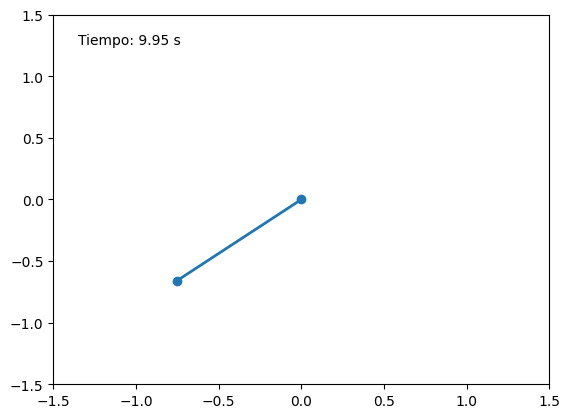

In [23]:
animator = Animator(t, theta, draw_trace=False)
animator.animate()
animator.save_animation(filename=f"{filename}.gif")

## Análisis de resultados: Péndulo Simple 

<div style="display: flex; justify-content: center; text-align: center;">
    <div style="margin: 10px;">
        <img src="animations/simple_pendulum.gif" width="50%">
    </div>
</div>

### Espacio fase

<div style="display: flex; justify-content: center; text-align: center;">
    <div style="margin: 10px;">
        <img src="plots/phase_space_simple_pendulum.png" width="50%">
    </div>
</div>

### Energía

<div style="display: flex; justify-content: center; text-align: center;">
    <div style="margin: 10px;">
        <img src="plots/energy_time_simple_pendulum.png" width="50%">
    </div>
</div>


# **Péndulo forzado-amortiguado**

## **Solución Analítica**

El péndulo forzado es un sistema dinámico clásico que se modela con una ecuación diferencial no lineal. Usaremos la mecánica lagrangiana para obtener la ecuación de movimiento.

### **Planteamiento del problema**  
Consideremos un péndulo simple de longitud l$ y masa $m$, sometido a una fuerza externa periódica $F(t)$ y a un término de amortiguamiento proporcional a la velocidad angular.  

#### Parámetros del sistema:
- $\theta$ : Ángulo del péndulo respecto a la vertical.
- $l$ : Longitud de la cuerda.
- $m$ : Masa puntual en el extremo del péndulo.
- $g$ : Aceleración gravitatoria.
- $\gamma$ : Coeficiente de amortiguamiento (proporcional a \( \dot{\theta} \)).
- $F_0$ : Amplitud de la fuerza externa.
- $\omega$S : Frecuencia de la fuerza externa.

La ecuación de la fuerza externa es:
$$F(t) = F_0 \cos(\omega t)$$

donde $F_0$ es la amplitud y $\omega$ es la frecuencia.


### **Energía del sistema**

#### Energía cinética  
El péndulo tiene velocidad angular $\dot{\theta}$, y su energía cinética es:
$$T = \frac{1}{2} m v^2 $$

La velocidad del punto de masa es $v = l \dot{\theta}$, por lo que:
$$T = \frac{1}{2} m (l \dot{\theta})^2 = \frac{1}{2} m l^2 \dot{\theta}^2$$

#### Energía potencial  
La altura de la masa respecto a la posición de equilibrio es:
$$h = l(1 - \cos\theta)
$$
por lo que la energía potencial gravitatoria es:
$$U = mg l (1 - \cos\theta)$$

### **Lagrangiano del sistema**  
El lagrangiano se define como:
$$L = T - U
$$
Sustituyendo las expresiones anteriores:
$$ L = \frac{1}{2} m l^2 \dot{\theta}^2 - mg l (1 - \cos\theta) $$

### **Ecuación de Lagrange**  
La ecuación de Euler-Lagrange es:
$$\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} = Q_{\text{nc}}
$$

Calculamos las derivadas parciales:

1. Derivada con respecto a \( $\dot{\theta}$ \):
$$ \frac{\partial L}{\partial \dot{\theta}} = m l^2 \dot{\theta} $$   
$$ \frac{d}{dt} \left( m l^2 \dot{\theta} \right) = m l^2 \ddot{\theta} $$

2. Derivada con respecto a \( $\theta$ \):
$$ \frac{\partial L}{\partial \theta} = mg l \sin\theta $$

El sistema está sujeto a dos fuerzas no conservativas:

- **Amortiguamiento viscoso**, proporcional a $\dot{\theta}$, con un término de la forma  $-b \dot{\theta}$.
- **Fuerza externa periódica**, representada como $F_0 \cos(\omega t)$.

El término de fuerzas no conservativas es:
$$Q_{\text{nc}} = - b \dot{\theta} + F_0 \cos(\omega t) $$

Entonces, la ecuación de Euler-Lagrange nos da:
$$ m l^2 \ddot{\theta} + b \dot{\theta} + mg l \sin\theta = F_0 \cos(\omega t) $$

Dividiendo entre \( $m l^2$ \):
$$\ddot{\theta} + \frac{b}{m l^2} \dot{\theta} + \frac{g}{l} \sin\theta = \frac{F_0}{m l^2} \cos(\omega t) $$
Definiendo:
- **Frecuencia natural del péndulo** $\omega_0^2 = \frac{g}{l}$,
- **Término de amortiguamiento** $\gamma = \frac{b}{m l^2}$,
- **Aceleración normalizada de la fuerza externa** $f = \frac{F_0}{m l^2} $,

obtenemos la ecuación de movimiento final:

$$\ddot{\theta} + \gamma \dot{\theta} + \omega_0^2 \sin\theta = f \cos(\omega t)
$$
Esta ecuación no lineal describe el movimiento del péndulo forzado y amortiguado.

---

### Generación de datos: **Resonancia**

Para estudiar la **resonancia** en el péndulo forzado y amortiguado, consideramos simulaciones variando la frecuencia de la fuerza externa $\omega_f$ en relación con la **frecuencia natural del péndulo**:  

$$ \omega_0 = \sqrt{\frac{g}{l}} $$

Con $g = 9.81$ m/s² y  $l = 1.0$ m, entonces:

$$\omega_0 \approx 3.13 \text{ rad/s} $$

Tenemos los siguientes escenarios para comparar:

| **Caso**          | **$\omega_f$** | **Descripción** |
|------------------|---------------|----------------|
| **Baja frecuencia**  | \( 1.0 \)     | Oscilaciones lentas, la fuerza externa tiene poco efecto. |
| **Cercano a la resonancia** | \( 3.1 \)     | La amplitud crece significativamente (máxima respuesta). |
| **Alta frecuencia** | \( 6.0 \)     | La respuesta del péndulo es menor, la inercia domina. |

**Otros parámetros fijos para todas las simulaciones**:
- **Masa:** \( m = 1.0 \) kg  
- **Longitud:** \( l = 1.0 \) m  
- **Ángulo inicial:** \( \theta_0 = \pi/4 \) rad  
- **Velocidad angular inicial:** \( \omega_0 = 0.0 \) rad/s  
- **Amplitud de la fuerza externa:** \( A = 1.0 \)  
- **Coeficiente de amortiguamiento:** \( \gamma = 0.1 \)  
- **Tiempo total:** \( t_{\max} = 20 \) s  
- **Paso de tiempo:** \( dt = 0.01 \) s  


In [37]:
!python forced_pendulum_system.py --omega_f 1.0 --filename low_freq
!python forced_pendulum_system.py --omega_f 3.1 --filename near_resonance
!python forced_pendulum_system.py --omega_f 6.0 --filename high_freq

Simulación completada. Datos guardados en data/low_freq.dat
Simulación completada. Datos guardados en data/near_resonance.dat
Simulación completada. Datos guardados en data/high_freq.dat


c:\Users\isaul\Documents\python\computational_physics\pendulums\animator.py:62: UserWarning: frames=<bound method Animator.advance_time_step of <animator.Animator object at 0x0000011D80247470>> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.animation = animation.FuncAnimation(


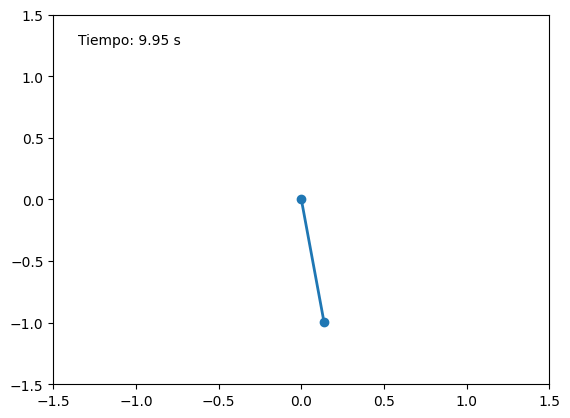

In [47]:
filename = "low_freq"
t, theta, omega, E_kin, E_pot, E_tot = load_data(file_path=f"data/{filename}.dat")
plot_phase_space(theta, omega, save=True, show=False, imname=f"phase_space_{filename}")
plot_energy_time(t, E_kin, E_pot, E_tot, save=True, show=False, imname=f"energy_{filename}")
plot_theta_time(t, theta, save=True, show=False, imname=f"theta_{filename}")

animator = Animator(t, theta, draw_trace=False)
animator.animate()
animator.save_animation(filename=f"{filename}.gif")

c:\Users\isaul\Documents\python\computational_physics\pendulums\animator.py:62: UserWarning: frames=<bound method Animator.advance_time_step of <animator.Animator object at 0x0000011D80869A00>> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.animation = animation.FuncAnimation(


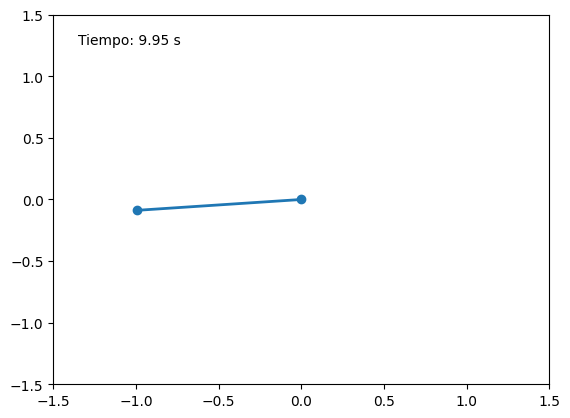

In [48]:
filename = "near_resonance"
t, theta, omega, E_kin, E_pot, E_tot = load_data(file_path=f"data/{filename}.dat")
plot_phase_space(theta, omega, save=True, show=False, imname=f"phase_space_{filename}")
plot_energy_time(t, E_kin, E_pot, E_tot, save=True, show=False, imname=f"energy_{filename}")
plot_theta_time(t, theta, save=True, show=False, imname=f"theta_{filename}")

animator = Animator(t, theta, draw_trace=False)
animator.animate()
animator.save_animation(filename=f"{filename}.gif")

c:\Users\isaul\Documents\python\computational_physics\pendulums\animator.py:62: UserWarning: frames=<bound method Animator.advance_time_step of <animator.Animator object at 0x0000011D80FAABA0>> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.animation = animation.FuncAnimation(


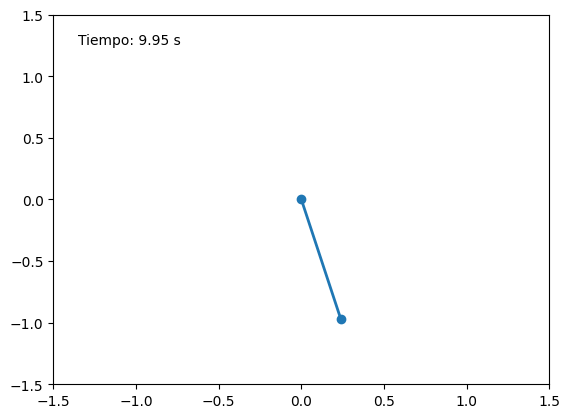

In [49]:
filename = "high_freq"
t, theta, omega, E_kin, E_pot, E_tot = load_data(file_path=f"data/{filename}.dat")
plot_phase_space(theta, omega, save=True, show=False, imname=f"phase_space_{filename}")
plot_energy_time(t, E_kin, E_pot, E_tot, save=True, show=False, imname=f"energy_{filename}")
plot_theta_time(t, theta, save=True, show=False, imname=f"theta_{filename}")

animator = Animator(t, theta, draw_trace=False)
animator.animate()
animator.save_animation(filename=f"{filename}.gif")

## Análisis de resultados: Resonancia

El objetivo de este análisis es estudiar el comportamiento del péndulo forzado y amortiguado bajo diferentes frecuencias de excitación externa. Específicamente, se comparan tres casos:

- Frecuencia baja ($\omega_f < \omega_0$): El péndulo oscila con pequeña amplitud y sigue el forzamiento con un retraso notable.

- Frecuencia cercana a la resonancia ($\omega_f \approx \omega_0$): Se observa una amplificación significativa de las oscilaciones, característica de la resonancia.

- Frecuencia alta ($\omega_f > \omega_0$): El péndulo apenas responde a la excitación debido a la rápida variación de la fuerza externa.

### Animaciones del movimiento del péndulo

<div style="display: flex; justify-content: center; text-align: center;">
    <div style="margin: 10px;">
        <img src="animations/low_freq.gif" width="100%">
    </div>
    <div style="margin: 10px;">
        <img src="animations/near_resonance.gif" width="100%">
    </div>
        <div style="margin: 10px;">
        <img src="animations/high_freq.gif" width="100%">
    </div>

</div>

### Evolución temporal de los ángulos

Como se observa en las siguientes gráficas, la amplitud de las oscilaciones es considerablemente mayor cuando la frecuencia externa está cerca de la resonancia. Para frecuencias bajas y altas, la respuesta es más limitada.

<div style="display: flex; justify-content: center; text-align: center;">
    <div style="margin: 10px;">
        <img src="plots/theta_timetheta_low_freq.png" width="100%">
    </div>
    <div style="margin: 10px;">
        <img src="plots/theta_timetheta_near_resonance.png" width="100%">
    </div>
        <div style="margin: 10px;">
        <img src="plots/theta_timetheta_high_freq.png" width="100%">
    </div>
</div>

### Espacio fase

El espacio fase ($\theta$ vs. $\omega$) revela información clave sobre la dinámica del sistema. En la resonancia, la trayectoria es más amplia, reflejando un mayor intercambio de energía.

<div style="display: flex; justify-content: center; text-align: center;">
    <div style="margin: 10px;">
        <img src="plots/phase_spacephase_space_low_freq.png" width="100%">
    </div>
    <div style="margin: 10px;">
        <img src="plots/phase_spacephase_space_near_resonance.png" width="100%">
    </div>
        <div style="margin: 10px;">
        <img src="plots/phase_spacephase_space_high_freq.png" width="100%">
    </div>
</div>

### Energía

<div style="display: flex; justify-content: center; text-align: center;">
    <div style="margin: 10px;">
        <img src="plots/energy_timeenergy_low_freq.png" width="100%">
    </div>
    <div style="margin: 10px;">
        <img src="plots/energy_timeenergy_near_resonance.png" width="100%">
    </div>
        <div style="margin: 10px;">
        <img src="plots/energy_timeenergy_high_freq.png" width="100%">
    </div>
</div>

En la resonancia, la energía total del sistema muestra oscilaciones amplificadas en comparación con los otros casos. Esto confirma que la energía suministrada por la fuerza externa se transfiere eficientemente al péndulo en la frecuencia de resonancia.

### Conclusiones

- En la frecuencia de resonancia ($\omega_f \approx \omega_0$), el péndulo responde con una gran amplitud, alcanzando el máximo intercambio de energía con la fuente externa.

- Para frecuencias bajas, el péndulo sigue la fuerza externa con una amplitud reducida.

- A frecuencias altas, la respuesta es débil porque la oscilación forzada cambia demasiado rápido para afectar significativamente al sistema.

- El análisis del espacio fase y de la energía respalda la predicción teórica del fenómeno de resonancia en sistemas oscilatorios amortiguados y forzados.

# **Péndulo elástico**

## **Solución Analítica**

### **Planteamiento del problema**
Se considera un **péndulo elástico**, es decir, una masa $m$ unida a un resorte de constante elástica $k$ y longitud natural $\ell_0$, colgado de un punto fijo. La masa puede oscilar tanto en dirección radial (longitud del resorte) como angular (movimiento pendular). Se asume que el sistema está restringido a un movimiento en un plano vertical y sin fricción.

El objetivo es obtener las ecuaciones de movimiento mediante la formulación de Lagrange.

---

### **Definición de coordenadas generalizadas**
Para describir el sistema, usamos coordenadas polares con:
- \( $r$ \): longitud del resorte (variable debido a la elasticidad)
- \( $\theta$ \): ángulo de oscilación del péndulo

Las coordenadas cartesianas de la masa son:
$$
x = r \sin\theta, \quad y = -r \cos\theta
$$
donde \( $y$ \) es negativo porque el resorte está colgado desde un punto fijo en el origen.

---

### **Energías del sistema**
#### **Energía cinética**
La energía cinética de la masa es:
$$
T = \frac{1}{2} m \left( \dot{x}^2 + \dot{y}^2 \right)
$$

Calculamos las velocidades:
$$
\dot{x} = \dot{r} \sin\theta + r \dot{\theta} \cos\theta
$$
$$
\dot{y} = -\dot{r} \cos\theta + r \dot{\theta} \sin\theta
$$

Por lo tanto, la energía cinética se expresa como:
$$
T = \frac{1}{2} m \left( \dot{r}^2 + r^2 \dot{\theta}^2 \right)
$$

#### **Energía potencial**
La energía potencial incluye dos términos: 
1. **Elástica** del resorte:
   $$
   U_{\text{el}} = \frac{1}{2} k (r - \ell_0)^2
   $$
2. **Gravitatoria**:
   $$
   U_{\text{g}} = mg r \cos\theta
   $$

La energía potencial total es:
$$
U = \frac{1}{2} k (r - \ell_0)^2 + mg r \cos\theta
$$

---

### **Función Lagrangiana**
La lagrangiana está dada por:
$$
L = T - U
$$

Sustituyendo las expresiones obtenidas:
$$
L = \frac{1}{2} m \left( \dot{r}^2 + r^2 \dot{\theta}^2 \right) - \left( \frac{1}{2} k (r - \ell_0)^2 + mg r \cos\theta \right)
$$

---

### **Ecuaciones de Lagrange**
Las ecuaciones de Euler-Lagrange son:

$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}_i} \right) - \frac{\partial L}{\partial q_i} = 0
$$

para \( $q_1 = r$ \) y \( $q_2 = \theta$ \).

#### **Ecuación para \( $r$ \)**
$$
\frac{d}{dt} (m \dot{r}) - \left[ m r \dot{\theta}^2 - k (r - \ell_0) - mg \cos\theta \right] = 0
$$

$$
m \ddot{r} = m r \dot{\theta}^2 - k (r - \ell_0) - mg \cos\theta
$$

#### **Ecuación para \( $\theta$ \)**
$$
\frac{d}{dt} (m r^2 \dot{\theta}) - (- mg r \sin\theta) = 0
$$

$$
m r^2 \ddot{\theta} + 2m r \dot{r} \dot{\theta} + mg r \sin\theta = 0
$$

---

Las ecuaciones de movimiento para el péndulo elástico son:

$$
\ddot{r} = r \dot{\theta}^2 - \frac{k}{m} (r - \ell_0) - g \cos\theta
$$

$$
\ddot{\theta} + \frac{2}{r} \dot{r} \dot{\theta} + \frac{g}{r} \sin\theta = 0
$$

Estas ecuaciones describen la evolución del sistema bajo la acción de la gravedad y la elasticidad del resorte. Se pueden resolver numéricamente para analizar el comportamiento del péndulo elástico.


In [66]:
def load_elastic_data(file_path="data/data.dat"):
    """Carga los datos desde el archivo .dat"""
    data = np.loadtxt(file_path, skiprows=1)
    t, theta, omega, l, v, E_kin, E_pot, E_elastic, E_tot = data.T
    return t, theta, omega, l, v, E_kin, E_pot, E_elastic, E_tot

In [67]:
!python elastic_pendulum_system.py --theta0 0.15 --l_init 1.1 --filename elastic_A
!python elastic_pendulum_system.py --theta0 0.5 --l_init 1.3 --filename elastic_B
!python elastic_pendulum_system.py --theta0 1.0 --l_init 1.5 --filename elastic_C

Simulación completada. Datos guardados en data/elastic_A.dat
Simulación completada. Datos guardados en data/elastic_B.dat
Simulación completada. Datos guardados en data/elastic_C.dat


In [71]:
filename = "elastic_A"
t, theta, omega, l, v, E_kin, E_pot, E_elastic, E_tot = load_elastic_data(file_path=f"data/{filename}.dat")
plot_phase_space(theta, omega, save=True, show=False, imname=f"phase_space_{filename}")
plot_energy_time(t, E_kin, E_pot, E_tot, save=True, show=False, imname=f"energy_{filename}")
plot_theta_time(t, theta, save=True, show=False, imname=f"theta_{filename}")

# animator = Animator(t, theta, draw_trace=False)
# animator.animate()
# animator.save_animation(filename=f"{filename}.gif")

In [72]:
filename = "elastic_B"
t, theta, omega, l, v, E_kin, E_pot, E_elastic, E_tot = load_elastic_data(file_path=f"data/{filename}.dat")
plot_phase_space(theta, omega, save=True, show=False, imname=f"phase_space_{filename}")
plot_energy_time(t, E_kin, E_pot, E_tot, save=True, show=False, imname=f"energy_{filename}")
plot_theta_time(t, theta, save=True, show=False, imname=f"theta_{filename}")

# animator = Animator(t, theta, draw_trace=False)
# animator.animate()
# animator.save_animation(filename=f"{filename}.gif")

In [73]:
filename = "elastic_C"
t, theta, omega, l, v, E_kin, E_pot, E_elastic, E_tot = load_elastic_data(file_path=f"data/{filename}.dat")
plot_phase_space(theta, omega, save=True, show=False, imname=f"phase_space_{filename}")
plot_energy_time(t, E_kin, E_pot, E_tot, save=True, show=False, imname=f"energy_{filename}")
plot_theta_time(t, theta, save=True, show=False, imname=f"theta_{filename}")

# animator = Animator(t, theta, draw_trace=False)
# animator.animate()
# animator.save_animation(filename=f"{filename}.gif")

## Análisis de resultados:

### Animaciones del movimiento del péndulo

<!---

<div style="display: flex; justify-content: center; text-align: center;">
    <div style="margin: 10px;">
        <img src="animations/low_freq.gif" width="100%">
    </div>
    <div style="margin: 10px;">
        <img src="animations/near_resonance.gif" width="100%">
    </div>
        <div style="margin: 10px;">
        <img src="animations/high_freq.gif" width="100%">
    </div>

</div>
--->


### Evolución temporal de los ángulos

<div style="display: flex; justify-content: center; text-align: center;">
    <div style="margin: 10px;">
        <img src="plots/theta_timetheta_elastic_A.png" width="100%">
    </div>
    <div style="margin: 10px;">
        <img src="plots/theta_timetheta_elastic_B.png" width="100%">
    </div>
    <div style="margin: 10px;">
        <img src="plots/theta_timetheta_elastic_C.png" width="100%">
    </div>
</div>

### Espacio fase


<div style="display: flex; justify-content: center; text-align: center;">
    <div style="margin: 10px;">
        <img src="plots/phase_spacephase_space_elastic_A.png" width="100%">
    </div>
    <div style="margin: 10px;">
        <img src="plots/phase_spacephase_space_elastic_B.png" width="100%">
    </div>
    <div style="margin: 10px;">
        <img src="plots/phase_spacephase_space_elastic_C.png" width="100%">
    </div>
</div>

### Energía

<div style="display: flex; justify-content: center; text-align: center;">
    <div style="margin: 10px;">
        <img src="plots/energy_timeenergy_elastic_A.png" width="100%">
    </div>
        <div style="margin: 10px;">
        <img src="plots/energy_timeenergy_elastic_B.png" width="100%">
    </div>
    <div style="margin: 10px;">
        <img src="plots/energy_timeenergy_elastic_C.png" width="100%">
    </div>

</div>

### Conclusiones
